In [9]:
import pandas as pd
import numpy as np
import gzip
import requests
import time
from os.path import exists
import matplotlib.pyplot as plt

Processing train-images-idx3-ubyte.gz
Processing train-labels-idx1-ubyte.gz
Processing t10k-images-idx3-ubyte.gz
Processing t10k-labels-idx1-ubyte.gz
Done!


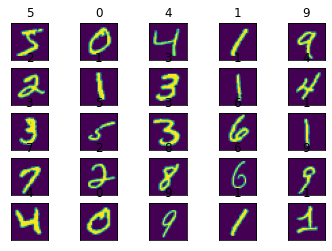

Total time in seconds: 30.29927520000001


0.9691

In [10]:
filenames = {
    "train_images": "train-images-idx3-ubyte.gz",
    "train_labels": "train-labels-idx1-ubyte.gz",
    "test_images": "t10k-images-idx3-ubyte.gz",
    "test_labels": "t10k-labels-idx1-ubyte.gz"
}

# Fetch the data

url = "http://yann.lecun.com/exdb/mnist/"

for fname in filenames.values():
    print(f"Processing {fname}")
    if not exists(fname):
        print(f"Downloading {fname}")
        resp = requests.get(url + fname)
        with open(fname, "wb") as file:
            file.write(resp.content)
print("Done!")

# Load data

def read_labels(fname):
    with gzip.open(fname) as file:
        lines = np.frombuffer(file.read(), dtype=np.uint8, offset=8)
    return lines


def read_images(fname):
    with gzip.open(fname) as file:
        lines = np.frombuffer(file.read(), dtype=np.uint8, offset=16).reshape((-1,784))/255
    return lines


train_images = read_images(filenames['train_images'])
train_labels = read_labels(filenames['train_labels'])
test_images = read_images(filenames['test_images'])
test_labels = read_labels(filenames['test_labels'])


fig, axes = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        ax = axes[i, j]
        ax.imshow(train_images[5 * i + j].reshape(28, 28))
        ax.set_title(train_labels[5 * i + j])
        ax.set_xticks([])
        ax.set_yticks([])
plt.show()


def predict_1nn(test_images, train_images, train_labels):
    distances = np.sum(train_images**2, axis=1)[:, np.newaxis] - 2 * train_images@test_images.T + np.sum(test_images**2, axis=1)
    indices = distances.argmin(axis=0)
    return train_labels[indices]


time_0 = time.perf_counter()
prediction = predict_1nn(test_images, train_images, train_labels)
time_1 = time.perf_counter()
time_total = time_1 - time_0
print(f'Total time in seconds: {time_total}')

pd.crosstab(test_labels, prediction)

(test_labels == prediction).mean()

